In [37]:
import pandas as pd
from dateutil import tz
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [2]:
weather = pd.read_csv('Jan_2008__Aug_2023_weather_data.csv')
neg_temp_cond = weather['temp'] < 0
weather = weather.loc[~neg_temp_cond] # getting rid of observation where weather is negative temperature (-18000)

In [3]:
weather.shape

(137039, 28)

In [4]:
weather.columns

Index(['dt', 'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp',
       'visibility', 'dew_point', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'sea_level', 'grnd_level', 'humidity', 'wind_speed',
       'wind_deg', 'wind_gust', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

In [5]:
weather['temp'].describe()

count    137039.000000
mean         66.436397
std          17.687472
min           0.120000
25%          53.380000
50%          68.430000
75%          79.990000
max         109.170000
Name: temp, dtype: float64

Almost no difference between actual temp and feels like

In [6]:
(weather['temp'] - weather['feels_like']).describe()

count    137039.000000
mean         -0.067717
std           3.909013
min         -12.600000
25%          -1.280000
50%           0.020000
75%           1.940000
max          12.600000
dtype: float64

In [7]:
def utc_to_cst_timestamp_string(ts):
    from_zone = tz.gettz('UTC')
    to_zone = tz.gettz('America/Chicago')
    json_data = {'time': str(ts)}
    utc = datetime.strptime(json_data['time'], '%Y-%m-%d %H:%M:%S +0000 UTC')
    utc = utc.replace(tzinfo=from_zone)
    cst = utc.astimezone(to_zone)
    date_time = cst.strftime("%Y-%m-%d %H:%M:%S")
    return date_time

In [8]:
weather['cst_timestamp'] = weather['dt_iso'].apply(lambda x: utc_to_cst_timestamp_string(x))
weather['date'] = weather['cst_timestamp'].apply(lambda x: x.split(' ')[0])
weather['time'] = weather['cst_timestamp'].apply(lambda x: x.split(' ')[1])

In [9]:
in_scope = weather[weather['date'] >= '2023-05-01']
max_weather = in_scope.groupby('date')['temp'].max()

Local N day average calculation

In [10]:
three_day_average = max_weather.groupby(np.arange(len(max_weather))//3).mean()
three_day_average.index = [max_weather.index[i] for i in range(0, max_weather.shape[0], 3)]

five_day_average = max_weather.groupby(np.arange(len(max_weather))//5).mean()
five_day_average.index = [max_weather.index[i] for i in range(0, max_weather.shape[0], 5)]

The blue line is the original weather signal, the purple line is the consecutive 5 day average

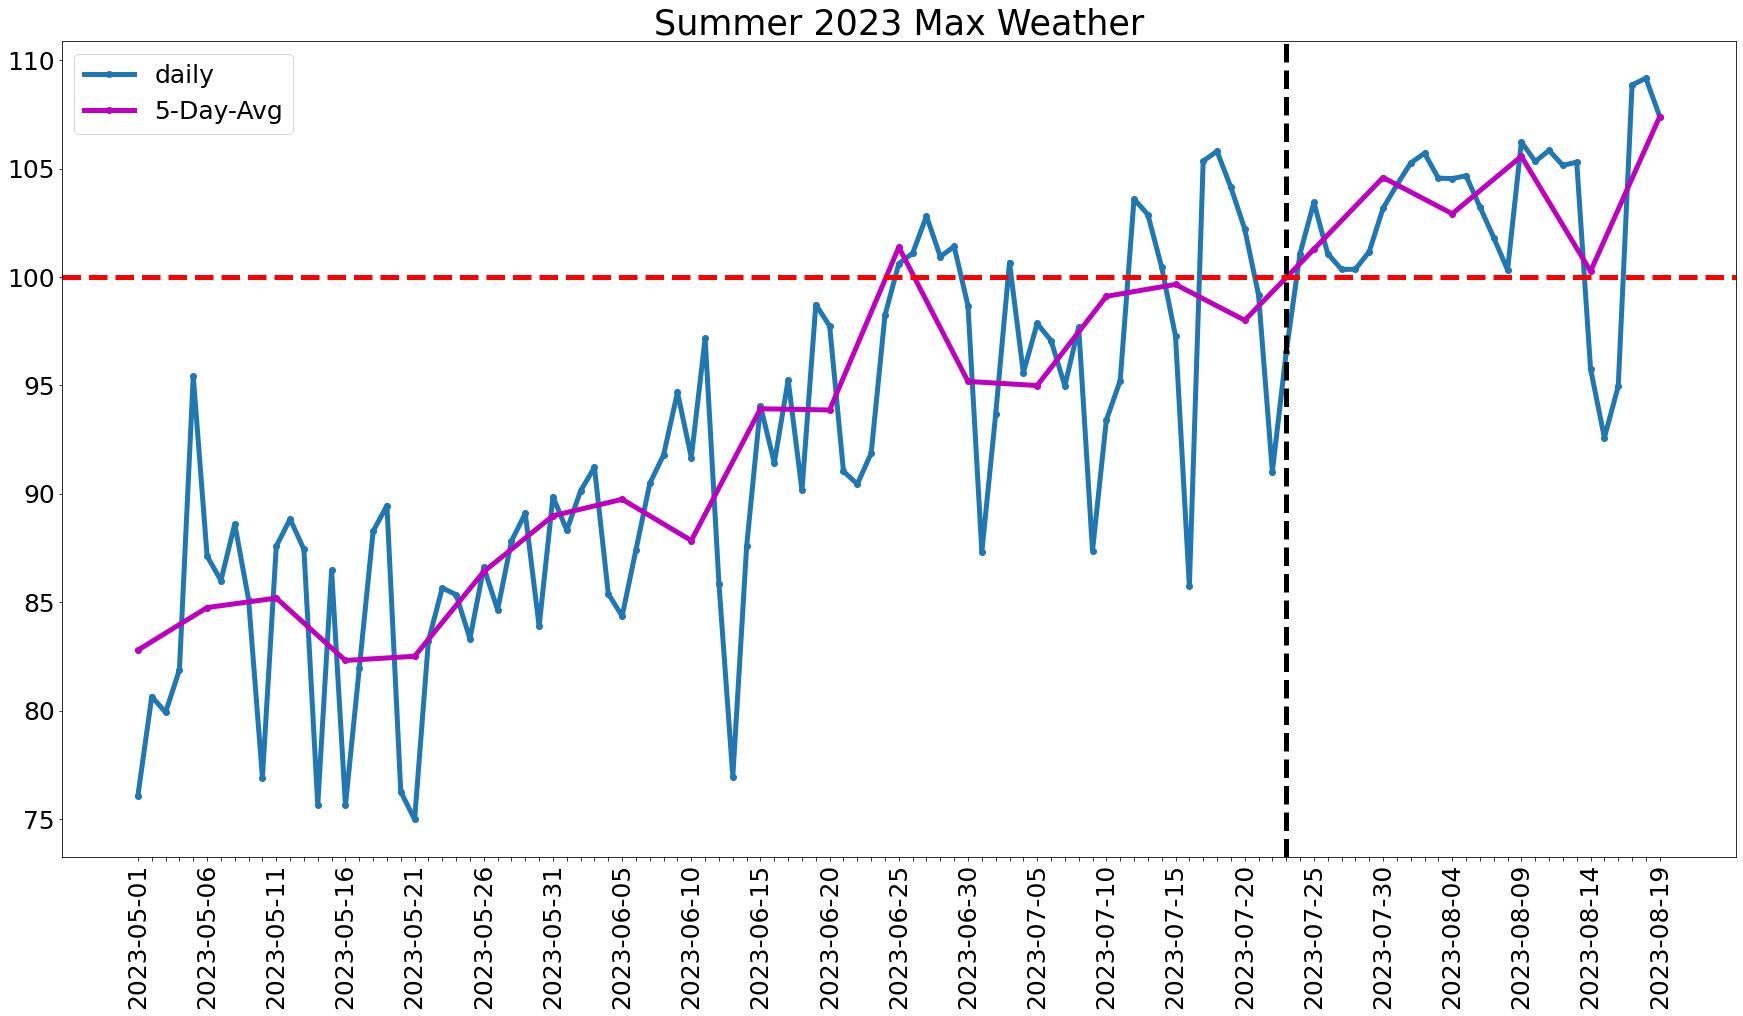

In [42]:
plt.rcParams["figure.figsize"] = (30, 15)
fig, ax = plt.subplots()

ax.plot_date(max_weather.index, max_weather, linestyle='solid', linewidth=5, label='daily')
ax.plot_date(five_day_average.index, five_day_average, linestyle='solid', linewidth=5, color='m', label='5-Day-Avg')

original_labels = [str(label) for label in ax.get_xticks()]
labels_of_interest = [str(i) for i in np.arange(0,len(original_labels),5)]
new_labels = [str(max_weather.index[int(label)]) if label in labels_of_interest else "" for label in original_labels]

ax.set_xticklabels(new_labels)
plt.xticks(rotation=90)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.title('Summer 2023 Max Weather', fontsize=35)
plt.axhline(y = 100, color = 'r', linestyle = 'dashed', linewidth=5)
plt.axvline(x = 83, color = 'k', linestyle = 'dashed', linewidth=5)
plt.legend(fontsize=25)
print()
print()
plt.show()
print()
print()
fig.savefig('Summer_2023_Max_Weather.png')

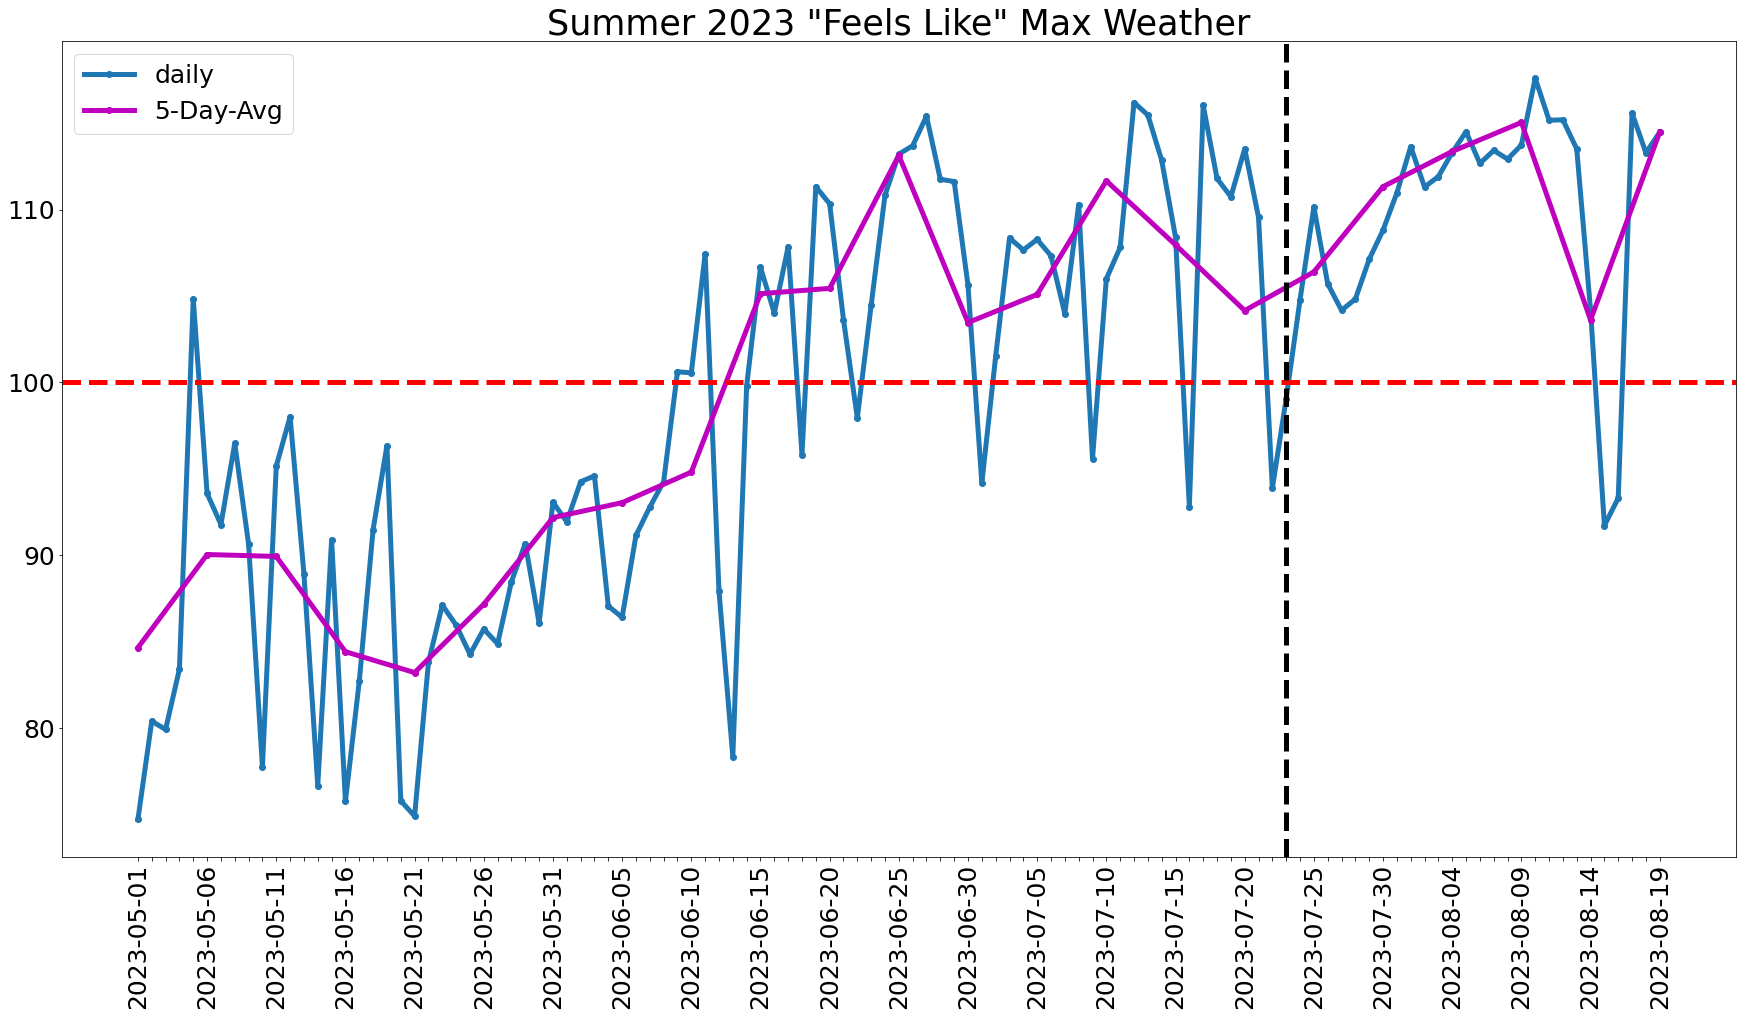

In [44]:
max_weather_feels_like = in_scope.groupby('date')['feels_like'].max()
five_day_feels_like_average = max_weather_feels_like.groupby(np.arange(len(max_weather_feels_like))//5).mean()
five_day_feels_like_average.index = [max_weather_feels_like.index[i] for i in range(0, max_weather_feels_like.shape[0], 5)]
plt.rcParams["figure.figsize"] = (30, 15)
fig, ax = plt.subplots()
ax.plot_date(max_weather_feels_like.index, max_weather_feels_like, linestyle='solid', linewidth=5, label='daily')
#ax.plot_date(three_day_average.index, three_day_average, linestyle='solid', linewidth=5, color='g')
ax.plot_date(five_day_feels_like_average.index, five_day_feels_like_average, linestyle='solid', linewidth=5, color='m', label='5-Day-Avg')
original_labels = [str(label) for label in ax.get_xticks()]
labels_of_interest = [str(i) for i in np.arange(0,len(original_labels),5)]
new_labels = [str(max_weather.index[int(label)]) if label in labels_of_interest else "" for label in original_labels]
ax.set_xticklabels(new_labels)
plt.xticks(rotation=90)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.title('Summer 2023 "Feels Like" Max Weather', fontsize=35)
plt.axhline(y = 100, color = 'r', linestyle = 'dashed', linewidth=5)
plt.axvline(x = 83, color = 'k', linestyle = 'dashed', linewidth=5)
plt.legend(fontsize=25)
print()
print()
plt.show()
fig.savefig('Summer_2023_Max_Weather_Feels_Like.png')
print()
print()

This time using moving averages, with sliding window of size 3 and 5 respectively

In [13]:
ma_3_max_weather = max_weather.rolling(3).mean()
ma_5_max_weather = max_weather.rolling(5).mean()

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_35900\2228831330.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


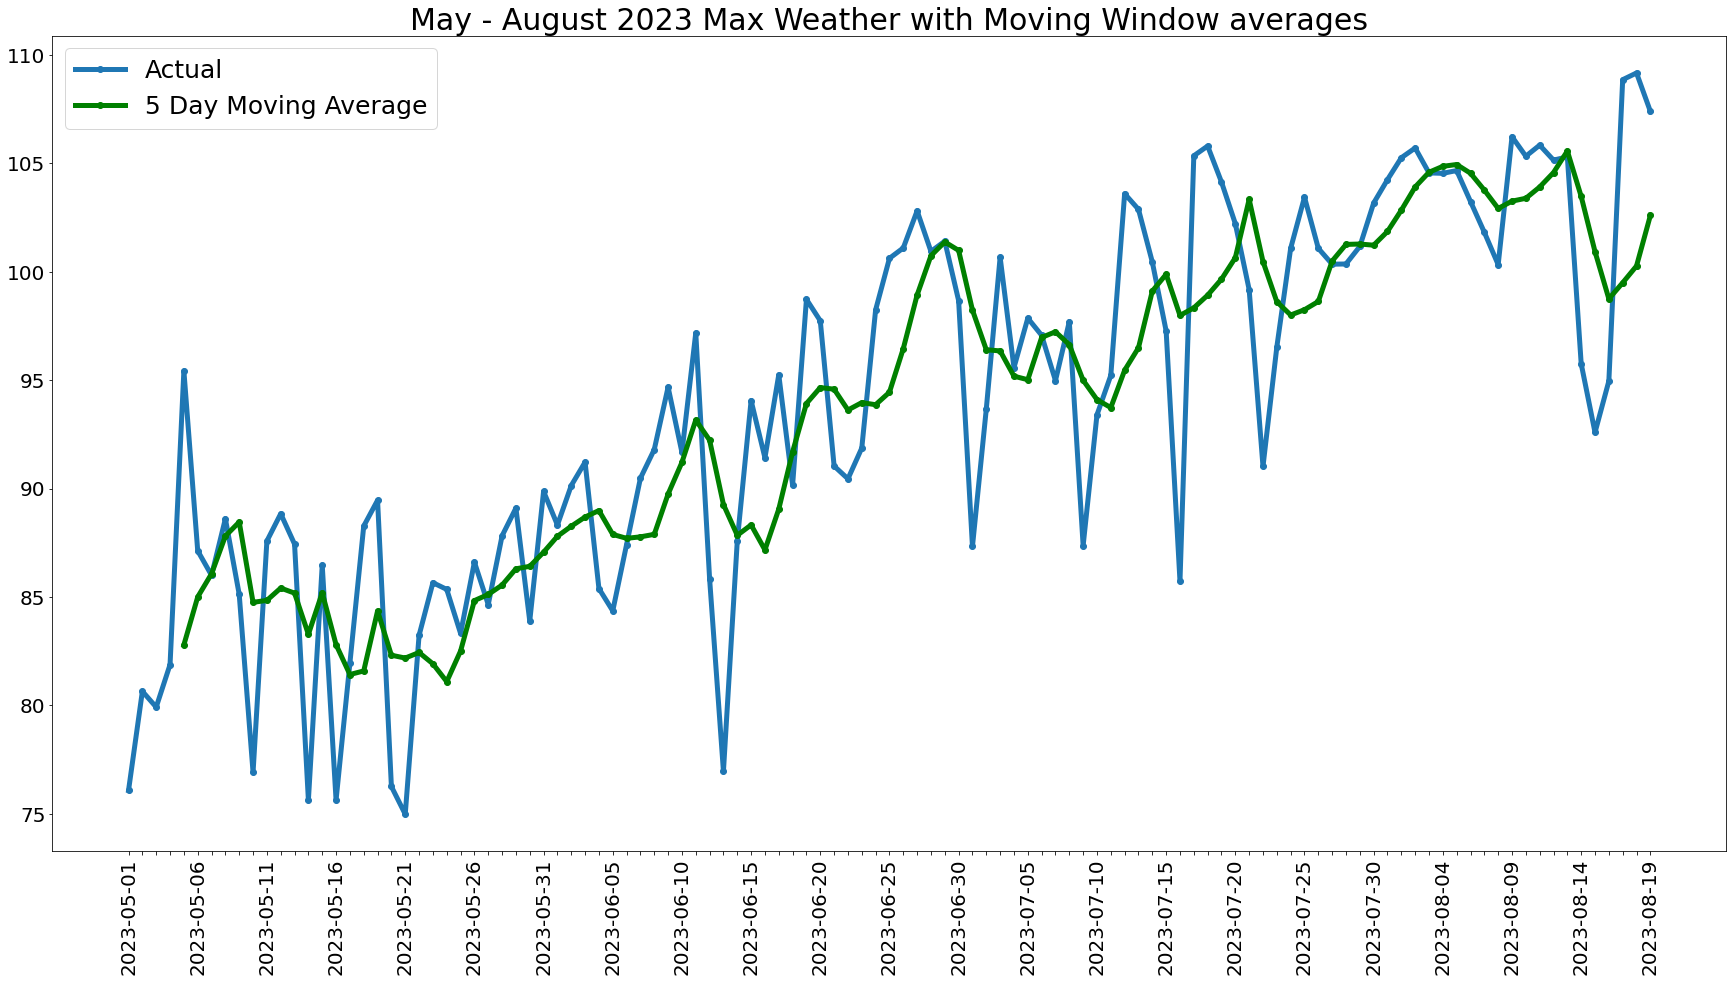

In [35]:
plt.rcParams["figure.figsize"] = (30, 15)
fig, ax = plt.subplots()
ax.plot_date(max_weather.index, max_weather, linestyle='solid', linewidth=5, label='Actual')
#ax.plot_date(ma_3_max_weather.index, ma_3_max_weather, linestyle='solid', linewidth=5, color='g')
ax.plot_date(ma_5_max_weather.index, ma_5_max_weather, linestyle='solid', linewidth=5, color='g', label='5 Day Moving Average')
#ax.plot_date(five_day_average.index, five_day_average, linestyle='solid', linewidth=5, color='m')
original_labels = [str(label) for label in ax.get_xticks()]
labels_of_interest = [str(i) for i in np.arange(0,len(original_labels),5)]
new_labels = [str(max_weather.index[int(label)]) if label in labels_of_interest else "" for label in original_labels]
ax.set_xticklabels(new_labels)
plt.xticks(rotation=90)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('May - August 2023 Max Weather with Moving Window averages', fontsize=30)
#plt.axhline(y = 100, color = 'r', linestyle = 'dashed', linewidth=5)
#plt.axvline(x = 83, color = 'k', linestyle = 'dashed', linewidth=5)
plt.legend(fontsize=25)
plt.show()
#plt.savefig()

In [15]:
weather['month'] = weather['date'].apply(lambda x: int(x.split('-')[1]))
weather['month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [16]:
in_scope = weather[weather['date'] >= '2023-05-01']

In [17]:
months = []

In [18]:
import calendar

In [19]:
def get_month_index(data):
    months = list(calendar.month_name)
    months.remove('')
    index = [months[month - 1] for month in data.index]
    data.index = index
    return data

In [48]:
def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', fontsize=15)

In [21]:
degree_sign = u'\N{DEGREE SIGN}'

### Monthly Max Temperature

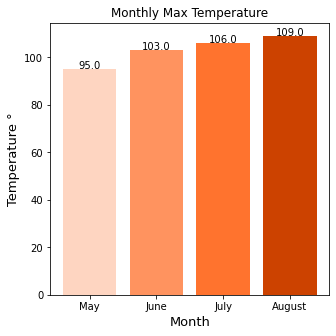

In [22]:
plt.rcParams["figure.figsize"] = (5, 5)
month_max_temp = in_scope.groupby(['month'])['temp'].max().round()
month_max_temp = get_month_index(month_max_temp)
plt.bar(month_max_temp.index, month_max_temp, color=('#fed5c1', '#ff935f', '#ff732e', '#cc4200'))
plt.title('Monthly Max Temperature')
plt.xlabel('Month', fontsize=13)
plt.ylabel(f'Temperature {degree_sign}', fontsize=13)
x = list(month_max_temp.index)
y = list(month_max_temp.values)
add_labels(x, y)
plt.show()

In [23]:
month_max_temp

May        95.0
June      103.0
July      106.0
August    109.0
Name: temp, dtype: float64

Monthly Max Feels Like Temparature

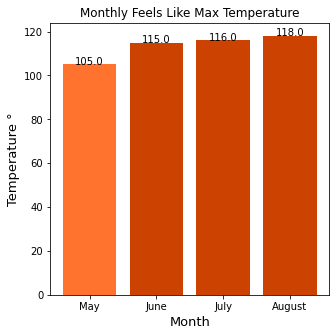

In [24]:
plt.rcParams["figure.figsize"] = (5, 5)
month_feels_like_max_temp = in_scope.groupby(['month'])['feels_like'].max().round()
month_feels_like_max_temp = get_month_index(month_feels_like_max_temp)
plt.bar(month_feels_like_max_temp.index, month_feels_like_max_temp, color=('#ff732e', '#cc4200', '#cc4200', '#cc4200'))
plt.title('Monthly Feels Like Max Temperature')
plt.xlabel('Month', fontsize=13)
plt.ylabel(f'Temperature {degree_sign}', fontsize=13)
x = list(month_feels_like_max_temp.index)
y = list(month_feels_like_max_temp.values)
add_labels(x, y)
plt.show()

June has the largest difference

### Max Temp Comparison 

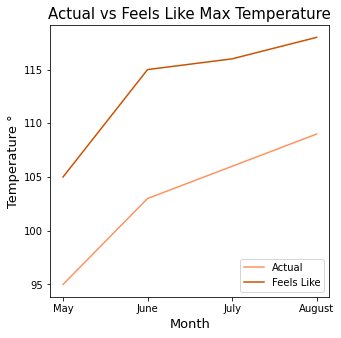

In [46]:
plt.rcParams["figure.figsize"] = (5, 5)
fig, ax = plt.subplots()
ax.plot(month_max_temp.index, month_max_temp, linestyle='solid', color='#ff935f', label='Actual')
ax.plot(month_feels_like_max_temp.index, month_feels_like_max_temp, linestyle='solid', color='#cc5200', label='Feels Like')
plt.title(f'Actual vs Feels Like Max Temperature', fontsize=15)
plt.xlabel('Month', fontsize=13)
plt.ylabel(f'Temperature {degree_sign}', fontsize=13)
#ax.plot_date(three_day_average.index, three_day_average, linestyle='solid', linewidth=5, color='g')

plt.legend(loc = 'lower right')
print()
print()
plt.show()
print()
print()
#plt.savefig()

### Monthly Average Temperature

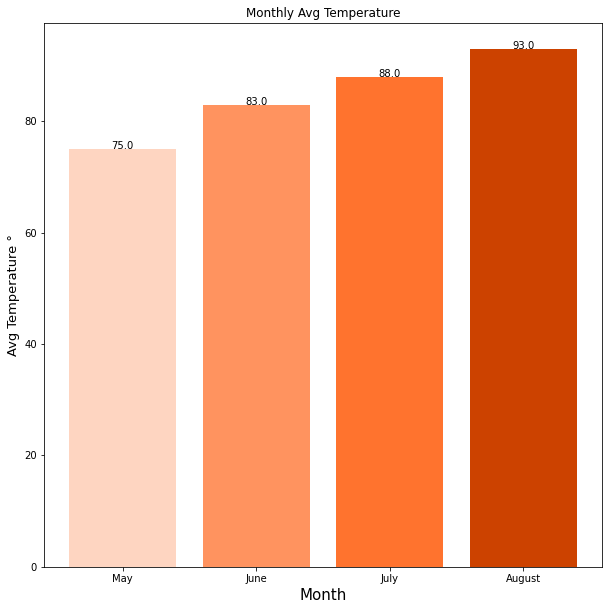

In [47]:
degree_sign = u'\N{DEGREE SIGN}'
plt.rcParams["figure.figsize"] = (10, 10)
month_avg_temp = in_scope.groupby(['month'])['temp'].mean().round()
month_avg_temp = get_month_index(month_avg_temp)
plt.bar(month_avg_temp.index, month_avg_temp, color=('#fed5c1', '#ff935f', '#ff732e', '#cc4200'))
plt.title('Monthly Avg Temperature')
plt.xlabel('Month', fontsize=15)
plt.ylabel(f'Avg Temperature {degree_sign}', fontsize=13)
x = list(month_avg_temp.index)
y = list(month_avg_temp.values)
add_labels(x, y)
plt.show()

### Monthly Average Temperature

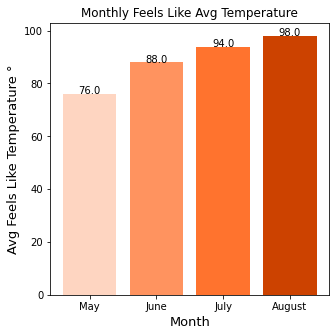

In [27]:
degree_sign = u'\N{DEGREE SIGN}'
plt.rcParams["figure.figsize"] = (5, 5)
month_feels_like_avg_temp = in_scope.groupby(['month'])['feels_like'].mean().round()
month_feels_like_avg_temp = get_month_index(month_feels_like_avg_temp)
plt.bar(month_feels_like_avg_temp.index, month_feels_like_avg_temp, color=('#fed5c1', '#ff935f', '#ff732e', '#cc4200'))
plt.title('Monthly Feels Like Avg Temperature')
plt.xlabel('Month', fontsize=13)
plt.ylabel(f'Avg Feels Like Temperature {degree_sign}', fontsize=13)
x = list(month_feels_like_avg_temp.index)
y = list(month_feels_like_avg_temp.values)
add_labels(x, y)
plt.show()

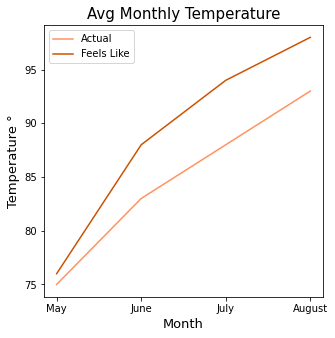

In [28]:
plt.rcParams["figure.figsize"] = (5, 5)
fig, ax = plt.subplots()
ax.plot(month_avg_temp.index, month_avg_temp, linestyle='solid', color='#ff935f', label='Actual')
ax.plot(month_feels_like_avg_temp.index, month_feels_like_avg_temp, linestyle='solid', color='#cc5200', label='Feels Like')
plt.title(f'Avg Monthly Temperature', fontsize=15)
plt.xlabel('Month', fontsize=13)
plt.ylabel(f'Temperature {degree_sign}', fontsize=13)
#ax.plot_date(three_day_average.index, three_day_average, linestyle='solid', linewidth=5, color='g')
plt.legend()
plt.savefig('AVG_Temp_Comparison_Plot.png')
plt.show()

In [29]:
display(month_avg_temp)
display(month_feels_like_avg_temp)

May       75.0
June      83.0
July      88.0
August    93.0
Name: temp, dtype: float64

May       76.0
June      88.0
July      94.0
August    98.0
Name: feels_like, dtype: float64

July has the greatest difference

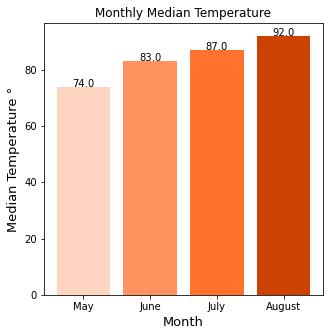

In [30]:
degree_sign = u'\N{DEGREE SIGN}'
plt.rcParams["figure.figsize"] = (5, 5)
month_median_temp = in_scope.groupby(['month'])['temp'].median().round()
month_median_temp = get_month_index(month_median_temp)
plt.bar(month_median_temp.index, month_median_temp, color=('#fed5c1', '#ff935f', '#ff732e', '#cc4200'))
plt.title('Monthly Median Temperature')
plt.xlabel('Month', fontsize=13)
plt.ylabel(f'Median Temperature {degree_sign}', fontsize=13)
x = list(month_median_temp.index)
y = list(month_median_temp.values)
add_labels(x, y)
plt.show()

Median monthly temperature distribution not too different from average, so this dataset is not very skewedm